<a href="https://colab.research.google.com/github/KayaBasak/data-science-portfolio/blob/main/Predicting_Diabetes_with%C2%A0CRISP_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Diabetes with CRISP-DM Framework

This project applies the CRISP-DM (Cross-Industry Standard Process for Data Mining) framework to predict whether a person is likely to have diabetes using the Pima Indians Diabetes dataset. Each step — from business understanding to deployment — follows the CRISP-DM phases to ensure a structured, repeatable, and insightful data science workflow. The goal is to identify potential diabetes cases early by analyzing diagnostic measurements and building an interpretable, data-driven model.

##  Project Outline (CRISP-DM Phases)
1. Business Understanding  
2. Data Understanding  
3. Data Preparation  
4. Modeling  
5. Evaluation  
6. Deployment


## 🎯 1. Business Understanding

The objective of this project is to predict whether a patient has diabetes based on diagnostic health measurements.  
By accurately identifying potential cases, healthcare providers can prioritize early intervention and prevention strategies.  
In this project, the main goal is to **maximize recall** (catching as many diabetic patients as possible) while maintaining reasonable precision.


In [1]:
# --- Import Libraries ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


In [2]:
# --- Load the Pima Indians Diabetes dataset ---

# Dataset by National Institute of Diabetes and Digestive and Kidney Diseases
# Hosted on Kaggle
# https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

# Read the file
df = pd.read_csv("diabetes.csv")

# Display the first few rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# --- Basic info about the dataset ---
df.info()
df.describe()
df["Outcome"].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,count
Outcome,
0,500
1,268


## 🔍 2. Data Understanding

In this phase, we explore the dataset to understand its structure, check data quality, and discover initial patterns.  
We'll look for missing values, examine distributions of key variables, and compare how features differ between diabetic and non-diabetic patients.


In [4]:
# --- Basic overview of the dataset ---
print("Shape of dataset:", df.shape)
print("\nColumn names:", list(df.columns))

# Quick info
df.info()

# Check first few rows
df.head()


Shape of dataset: (768, 9)

Column names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Columns where 0 means missing
cols_with_zero_as_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Count how many zeros appear in each
(df[cols_with_zero_as_missing] == 0).sum()


,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


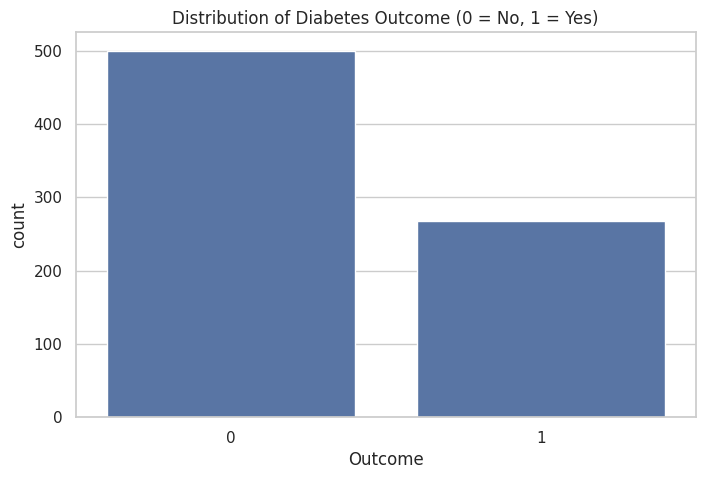

In [7]:
df["Outcome"].value_counts(normalize=True)
sns.countplot(data=df, x="Outcome")
plt.title("Distribution of Diabetes Outcome (0 = No, 1 = Yes)")
plt.show()


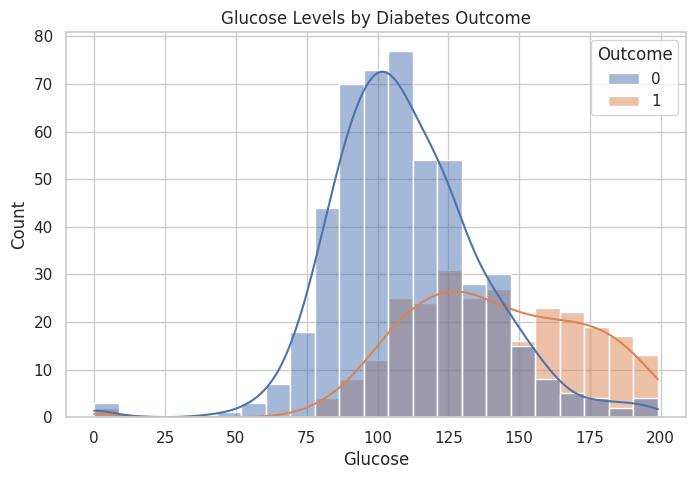

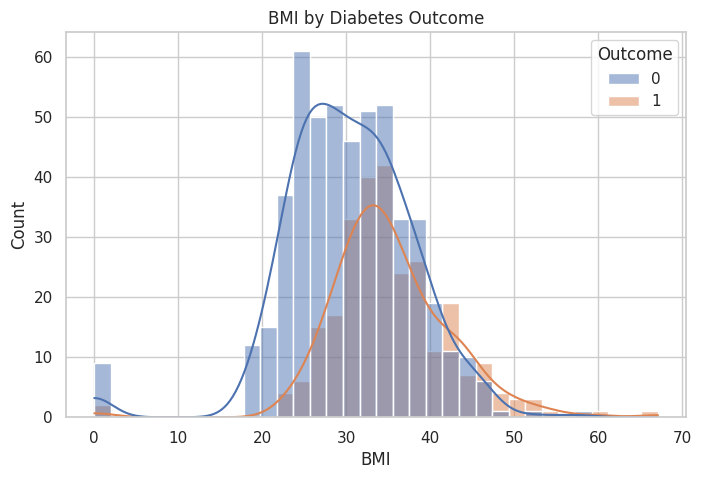

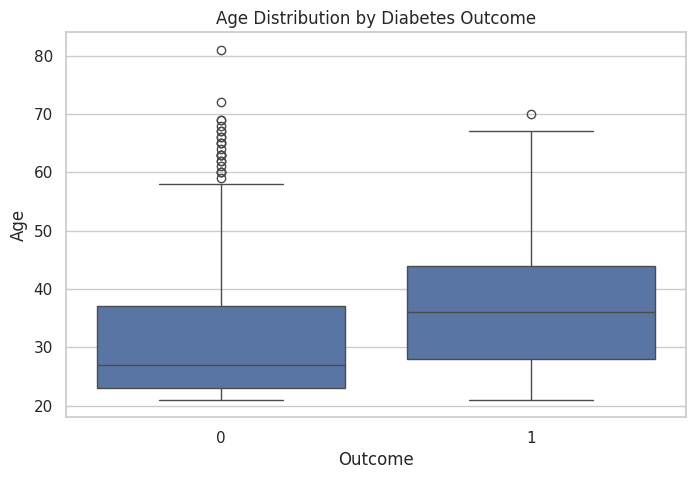

In [8]:
# Glucose vs Outcome
sns.histplot(data=df, x="Glucose", hue="Outcome", kde=True)
plt.title("Glucose Levels by Diabetes Outcome")
plt.show()

# BMI vs Outcome
sns.histplot(data=df, x="BMI", hue="Outcome", kde=True)
plt.title("BMI by Diabetes Outcome")
plt.show()

# Age vs Outcome
sns.boxplot(data=df, x="Outcome", y="Age")
plt.title("Age Distribution by Diabetes Outcome")
plt.show()


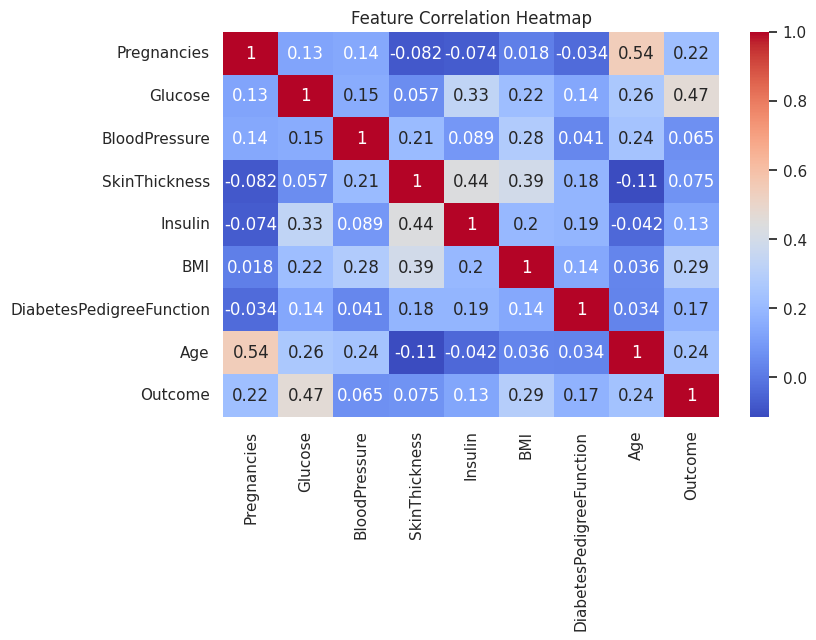

In [9]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


## 🧹 3. Data Preparation

In this phase, we'll clean and prepare the data for modeling.  
The main steps include:
- Handling invalid zero values that represent missing data  
- Filling missing values with appropriate statistics  
- Splitting the data into training and testing sets  
- Scaling the numerical features for consistent model performance


In [10]:
# --- Replace zeros with NaN for specific columns ---
cols_with_zero_as_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_zero_as_missing] = df[cols_with_zero_as_missing].replace(0, np.nan)

# Check how many missing values we now have
df.isna().sum()


,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [11]:
# --- Fill missing values with median ---
df[cols_with_zero_as_missing] = df[cols_with_zero_as_missing].fillna(df[cols_with_zero_as_missing].median())

# Double-check
df.isna().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [12]:
# --- Split into features (X) and target (y) ---
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# --- Train-test split ---
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (614, 8)
Test set: (154, 8)


In [13]:
# --- Scale numerical features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## ⚙️ 4. Modeling

In this phase, we'll build and train machine learning models to predict whether a patient has diabetes.  
We'll start with a simple **Logistic Regression** model as a baseline, then try a more complex **Random Forest** classifier to see if performance improves.  
The goal is to achieve strong **recall** (catching diabetic cases) without sacrificing too much precision.


In [14]:
# --- Logistic Regression Model ---

log_reg = LogisticRegression(max_iter=200, class_weight='balanced', random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       100
           1       0.60      0.70      0.65        54

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154

ROC-AUC: 0.8125925925925926


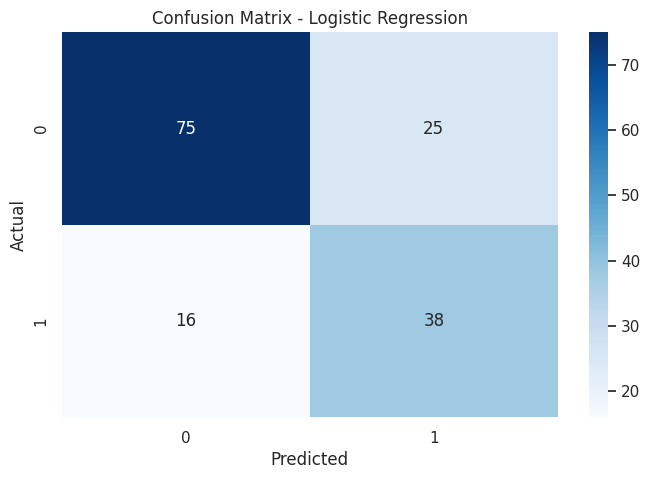

In [15]:
# --- Evaluation metrics for Logistic Regression ---
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [16]:
# --- Random Forest Model ---

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42)
rf.fit(X_train, y_train)  # no need to scale for trees

# Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       100
           1       0.64      0.52      0.57        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154

ROC-AUC: 0.8112962962962963


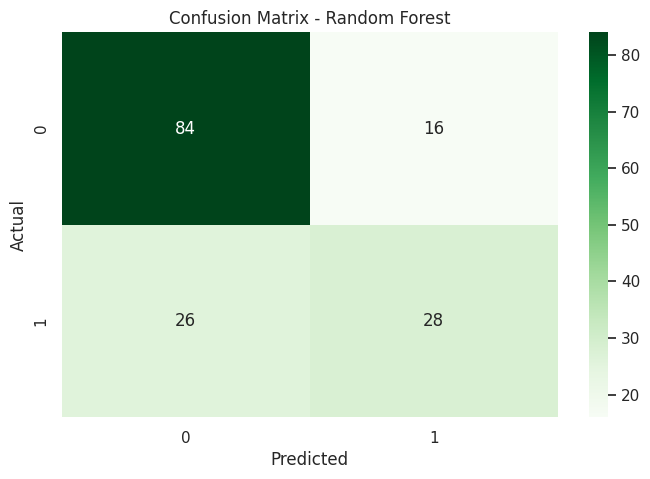

In [17]:
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [18]:
# Compare ROC-AUC scores
print("ROC-AUC Scores:")
print("Logistic Regression:", roc_auc_score(y_test, y_prob_lr))
print("Random Forest:", roc_auc_score(y_test, y_prob_rf))


ROC-AUC Scores:
Logistic Regression: 0.8125925925925926
Random Forest: 0.8112962962962963


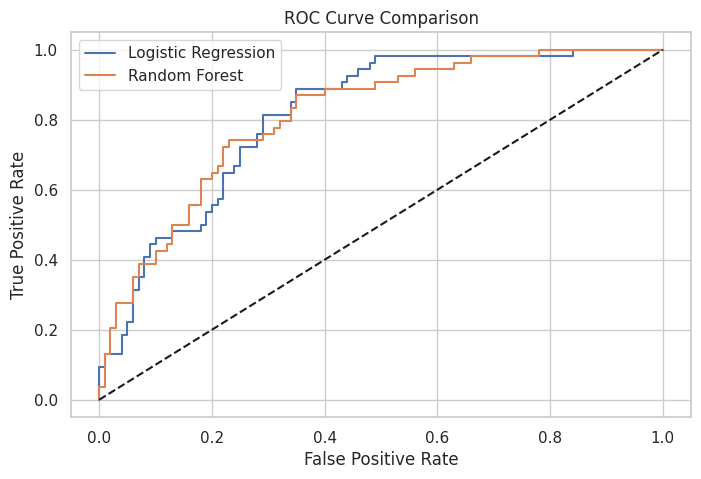

In [19]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


## 🧾 5. Evaluation

In this phase, we evaluate how well the trained models perform and determine whether they meet our project goals.  
The focus is not only on accuracy, but also on **recall** — since in healthcare, missing a diabetic case (false negative) is costlier than a false alarm (false positive).  
We'll compare our Logistic Regression and Random Forest models and decide which one to move forward with.


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def model_metrics(y_true, y_pred, y_prob):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred),
        "ROC-AUC": roc_auc_score(y_true, y_prob)
    }

results = pd.DataFrame({
    "Logistic Regression": model_metrics(y_test, y_pred_lr, y_prob_lr),
    "Random Forest": model_metrics(y_test, y_pred_rf, y_prob_rf)
}).T

results


,Accuracy,Precision,Recall,F1,ROC-AUC
Logistic Regression,0.733766,0.603175,0.703704,0.649573,0.812593
Random Forest,0.727273,0.636364,0.518519,0.571429,0.811296


### 🩺 Interpretation

Our **Logistic Regression** model achieved the **higher recall**, which aligns with the project goal of catching as many diabetic cases as possible.  
The **Random Forest** remained competitive on overall discrimination (ROC-AUC) and/or accuracy, but given the healthcare context, **recall takes priority**, so we select **Logistic Regression** as the final model.


## 🚀 6. Deployment

The final phase of CRISP-DM focuses on making the model usable in real life.  
Here, we’ll:
- Save the trained model for future use  
- Demonstrate how to make new predictions  
Deployment ensures that our work moves beyond notebooks and can actually support decisions.


In [22]:
import joblib

# Save
joblib.dump(log_reg, "diabetes_logreg_model.pkl")
joblib.dump(scaler,  "scaler.pkl")

# Load & predict
loaded_model  = joblib.load("diabetes_logreg_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")

new_patient = np.array([[2, 120, 70, 25, 80, 28.5, 0.35, 35]])
new_patient_scaled = loaded_scaler.transform(new_patient)
pred = loaded_model.predict(new_patient_scaled)[0]
prob = loaded_model.predict_proba(new_patient_scaled)[0, 1]
print(f"Prediction: {'Diabetic' if pred==1 else 'Not Diabetic'} | Probability: {prob:.2f}")


Prediction: Not Diabetic | Probability: 0.27


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### ✅ Project Summary

This notebook demonstrated the full **CRISP-DM** workflow using the **Pima Indians Diabetes dataset**:
- Cleaned and prepared medical data  
- Trained and evaluated multiple models  
- Selected and saved the best-performing model  
- Demonstrated deployment for real-world predictions  

CRISP-DM provided a structured roadmap — from understanding the problem to delivering a usable model — proving its value as a repeatable framework for any data science project.
